# Adobe Gensolve Round 2 Solution
### Team - anujpandey0513_Team
#### Anuj Pandey                                                  - Captain
#### Anshi Singh                                                  - Team Member
#### Ashutosh Singh Raghuvansi                                    - Team Member

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from sklearn.linear_model import LinearRegression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def load_csv(csv_path):
    # Load the CSV data into a NumPy array
    data = np.genfromtxt(csv_path, delimiter=',')
    
    # Prepare a list to store all paths and their associated polylines
    paths = []
    
    # Loop through each unique path identifier
    for path_id in np.unique(data[:, 0]):
        # Extract the data points for the current path
        path_data = data[data[:, 0] == path_id][:, 1:]
        
        # Prepare a list to store all polylines for this path
        polylines = []
        
        # Loop through each unique polyline identifier within the current path
        for polyline_id in np.unique(path_data[:, 0]):
            # Extract the data points for the current polyline
            polyline_data = path_data[path_data[:, 0] == polyline_id][:, 1:]
            polylines.append(polyline_data)
        
        # Add the polylines to the paths list
        paths.append(polylines)
    
    return paths

def plot_curves(paths, save_path=None):
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(tight_layout=True, figsize=(4, 4))
    
    # Loop through each path and its polylines
    for i, polylines in enumerate(paths):
        for polyline in polylines:
            # Plot each polyline with a specific label
            ax.plot(polyline[:, 0], polyline[:, 1], linewidth=2, label=f'Curve {i}')
    
    # Ensure the plot has equal aspect ratio and hide the axis
    ax.set_aspect("equal")
    ax.axis('off')

    # If a save path is provided, save the plot
    if save_path:
        plt.savefig(save_path, format='jpg', bbox_inches='tight', pad_inches=0)
    
    # Display the plot
    plt.show()


### For Frag2.csv(open)

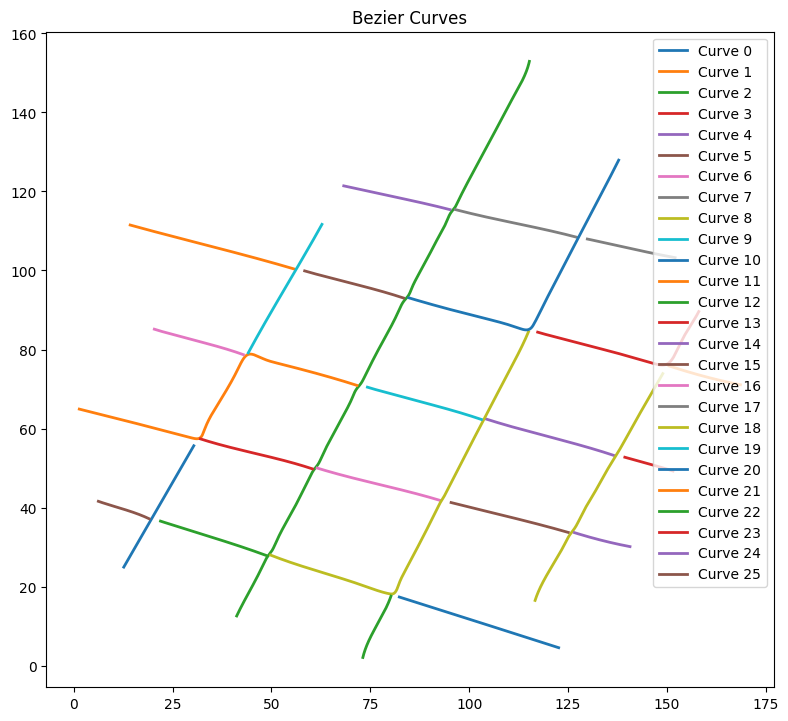

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def adjust_ends(points):
    # Ensure the first and last points are adjusted for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return curve

def plot_bezier_curves(paths):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    
    for idx, path in enumerate(paths):
        for segment in path:
            curve = compute_bezier_curve(segment)
            ax.plot(curve[0], curve[1], linewidth=2, label=f'Curve {idx}')
    
    ax.set_aspect("equal")
    plt.legend()
    plt.title('Bezier Curves')
    plt.show()


csv_path = "./problems/frag2.csv"
paths = load_csv(csv_path)
plot_bezier_curves(paths)


### For Frag 1

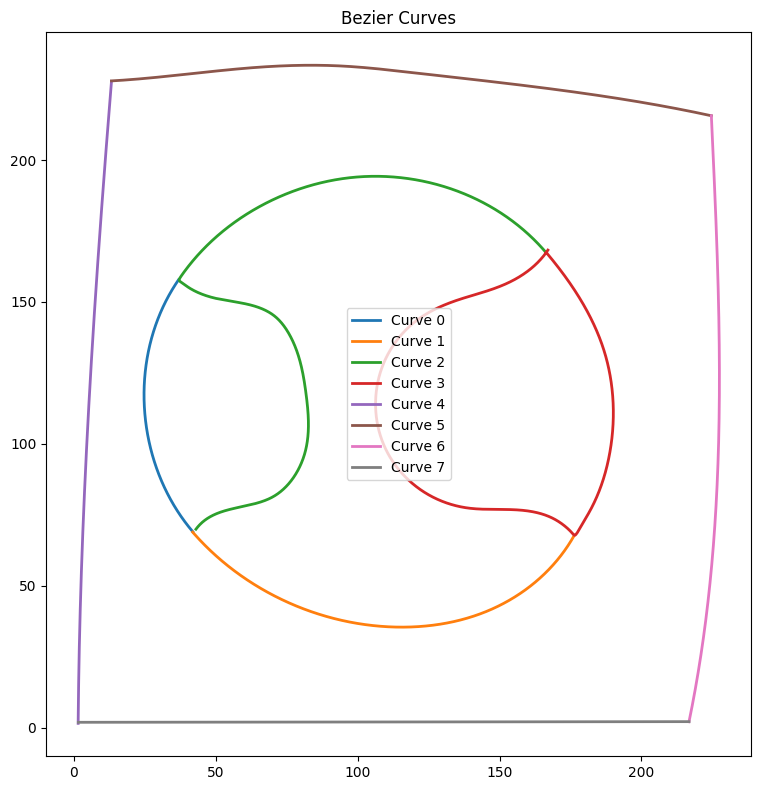

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def adjust_ends(points):
    # Ensure the first and last points are adjusted for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return curve

def plot_bezier_curves(paths):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    
    for idx, path in enumerate(paths):
        for segment in path:
            curve = compute_bezier_curve(segment)
            ax.plot(curve[0], curve[1], linewidth=2, label=f'Curve {idx}')
    
    ax.set_aspect("equal")
    plt.legend()
    plt.title('Bezier Curves')
    plt.show()


csv_path = "./problems/frag1.csv"
paths = load_csv(csv_path)
plot_bezier_curves(paths)


### For Frag 0

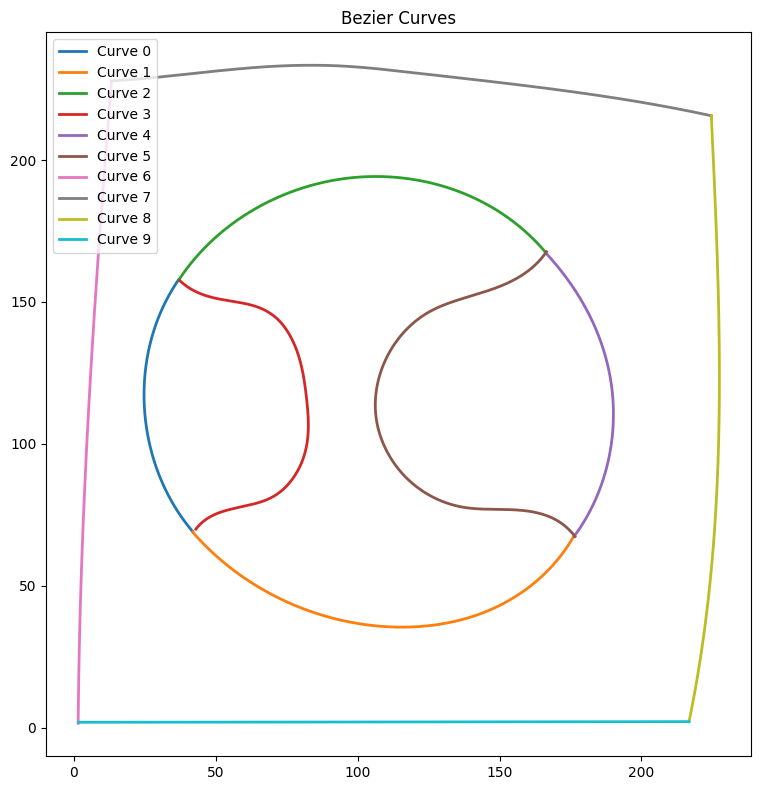

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def adjust_ends(points):
    # Ensure the first and last points are adjusted for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return curve

def plot_bezier_curves(paths):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    
    for idx, path in enumerate(paths):
        for segment in path:
            curve = compute_bezier_curve(segment)
            ax.plot(curve[0], curve[1], linewidth=2, label=f'Curve {idx}')
    
    ax.set_aspect("equal")
    plt.legend()
    plt.title('Bezier Curves')
    plt.show()


csv_path = "./problems/frag0.csv"
paths = load_csv(csv_path)
plot_bezier_curves(paths)


### Finding Curvature and Accuracy

Mean Squared Error: 0.21214451773676937
Maximum Deviation: 1.075374612386753


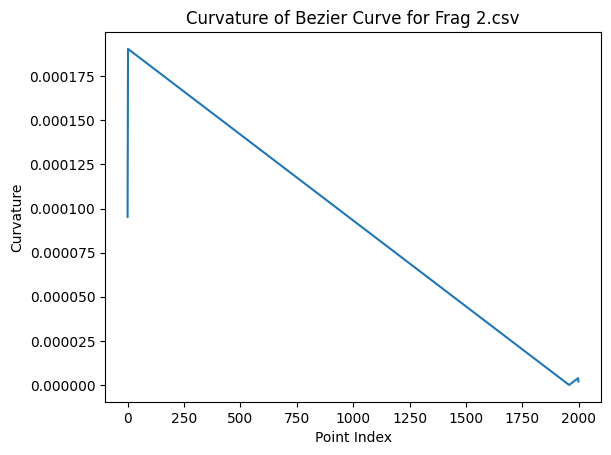

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev, interp1d

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the number of points in Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    # Calculate curvature using the formula
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Ensure the first and last points are adjusted for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = "./problems/frag2.csv" # You can use frag0, frag1 etc
paths = load_csv(csv_path)

# Evaluate accuracy for the first polyline and Bezier curve
original_points = np.array(paths[0][0])
bezier_curve = compute_bezier_curve(original_points, smooth_factor=0.8)
mse, max_dev = evaluate_accuracy(original_points, bezier_curve)

print(f"Mean Squared Error: {mse}")
print(f"Maximum Deviation: {max_dev}")

# Calculate and plot curvature
curvature = compute_curvature(bezier_curve)
plt.plot(curvature)
plt.title('Curvature of Bezier Curve for Frag 2.csv')
plt.xlabel('Point Index')
plt.ylabel('Curvature')
plt.show()


Mean Squared Error: 0.14462561397904505
Maximum Deviation: 1.0667967863873855


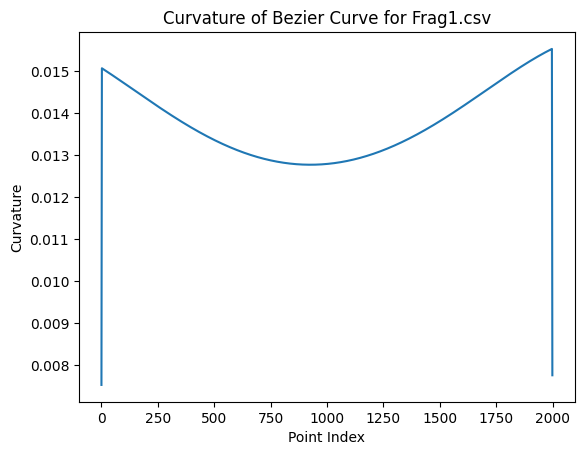

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev, interp1d

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the number of points in Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    # Calculate curvature using the formula
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Ensure the first and last points are adjusted for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = "./problems/frag1.csv"
paths = load_csv(csv_path)

# Evaluate accuracy for the first polyline and Bezier curve
original_points = np.array(paths[0][0])
bezier_curve = compute_bezier_curve(original_points, smooth_factor=0.8)
mse, max_dev = evaluate_accuracy(original_points, bezier_curve)

print(f"Mean Squared Error: {mse}")
print(f"Maximum Deviation: {max_dev}")

# Calculate and plot curvature
curvature = compute_curvature(bezier_curve)
plt.plot(curvature)
plt.title('Curvature of Bezier Curve for Frag1.csv')
plt.xlabel('Point Index')
plt.ylabel('Curvature')
plt.show()


### For Isolated Curves

### For Isolated.csv

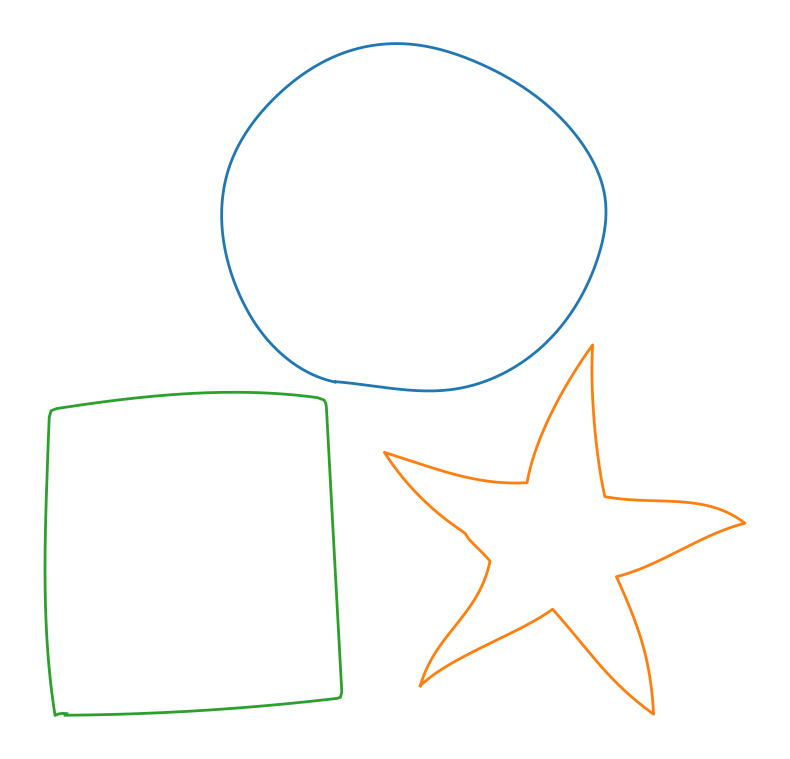

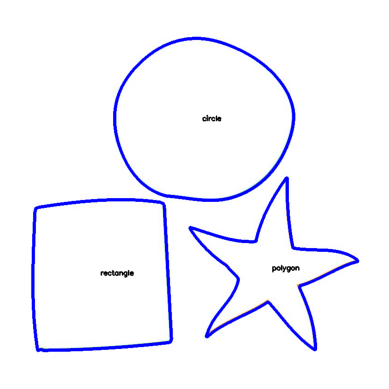

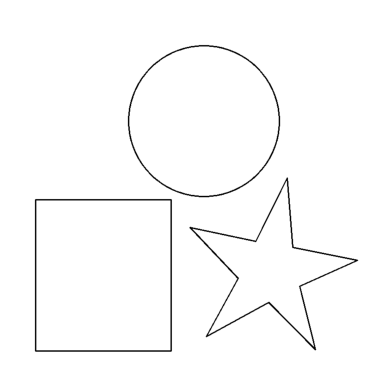

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def identify_shape(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) in [4, 5]:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the length of the Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    # Calculate curvature of the Bezier curve
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Adjust the first and last points for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    # Compute the Bezier curve from given points
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = './problems/isolated.csv'
plot_polylines(read_csv(csv_path), './problems/isolated.jpg')
img = cv2.imread('./problems/isolated.jpg')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.ones_like(img) * 255

# Process each contour to identify and draw shapes
for contour in contours:
    # Approximate the contour to simplify it
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Identify the shape based on the approximation
    shape_name = identify_shape(approx)

    # Calculate the centroid of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Draw the contour and shape name on the original image
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Draw the shape on the separate image
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    else:
        draw_shape(shape_image, shape_name, approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### For Isolated_sol.csv


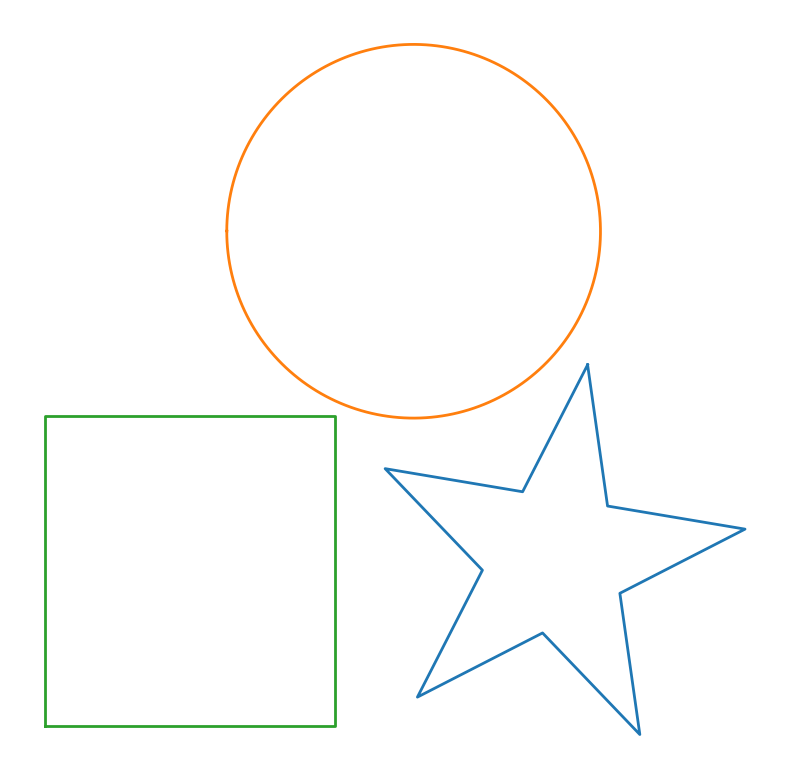

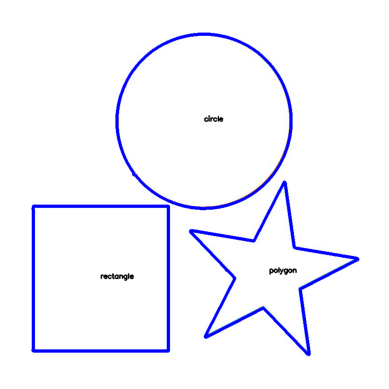

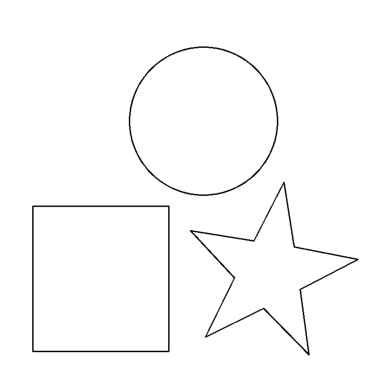

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def identify_shape(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) in [4, 5]:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the length of the Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    # Calculate curvature of the Bezier curve
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Adjust the first and last points for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    # Compute the Bezier curve from given points
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = './problems/isolated_sol.csv'
plot_polylines(read_csv(csv_path), './problems/isolated.svg')
img = cv2.imread('./problems/isolated.svg')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.ones_like(img) * 255

# Process each contour to identify and draw shapes
for contour in contours:
    # Approximate the contour to simplify it
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Identify the shape based on the approximation
    shape_name = identify_shape(approx)

    # Calculate the centroid of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Draw the contour and shape name on the original image
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Draw the shape on the separate image
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    else:
        draw_shape(shape_image, shape_name, approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### For Closed shapes


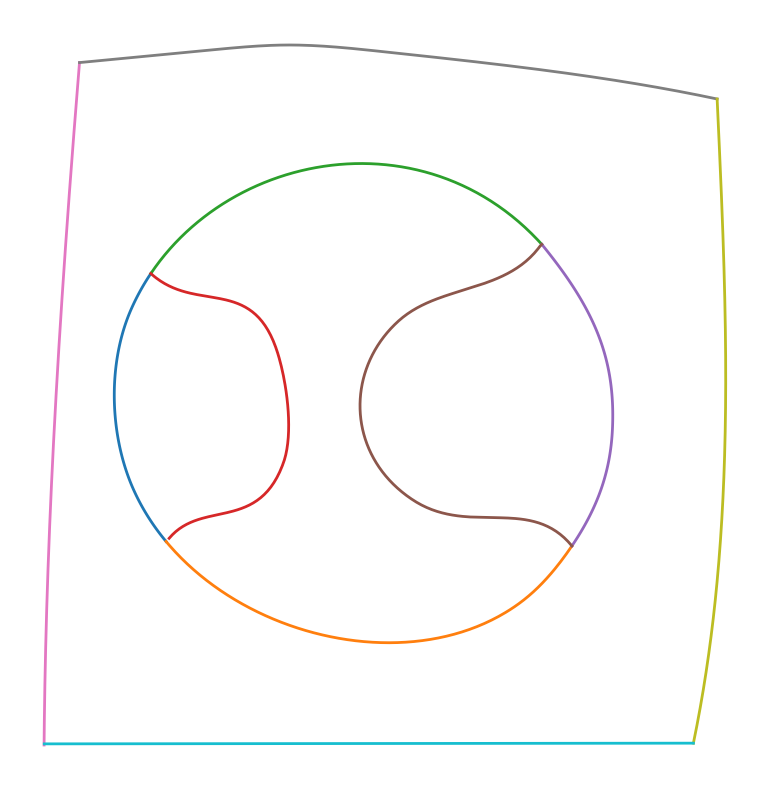

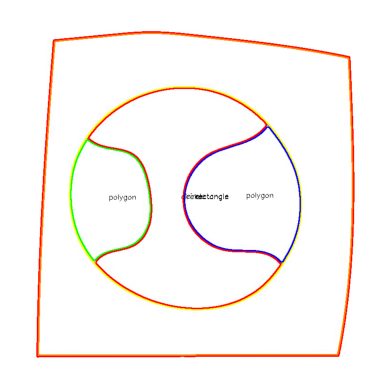

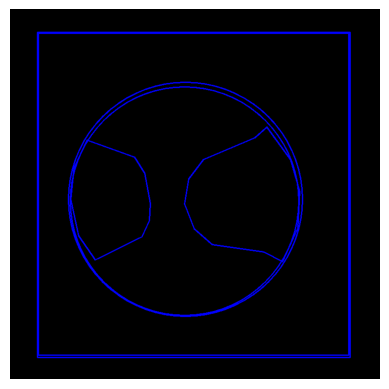

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 255, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 255, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(image, center, radius, 255, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=255, thickness=2)

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def getShapeName(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) == 4 or len(approx) == 5:
        return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

# Example usage
csv_path = './problems/frag0.csv'
plot_polylines(read_csv(csv_path), './problems/frag0.jpg')
img = cv2.imread('./problems/frag0.jpg')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.zeros_like(img)

# Process each contour to identify and draw shapes
for i, contour in enumerate(contours):
    epsilon = 0.0095 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Draw the contour and shape name on the original image
    colors = [(0, 0, 255), (0, 128, 255), (0, 255, 255), (0, 255, 0), (255, 0, 0)]
    cv2.drawContours(img, [contour], 0, colors[i % len(colors)], 2)

    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])
        shape_name = getShapeName(approx)
        cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

        # Draw the shape on the separate image
        if shape_name == 'rectangle':
            draw_shape(shape_image, 'rectangle', approx)
        elif shape_name == 'circle':
            draw_shape(shape_image, 'circle', approx)
        elif shape_name == 'polygon':
            draw_shape(shape_image, 'polygon', approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### For Occlusion1.csv

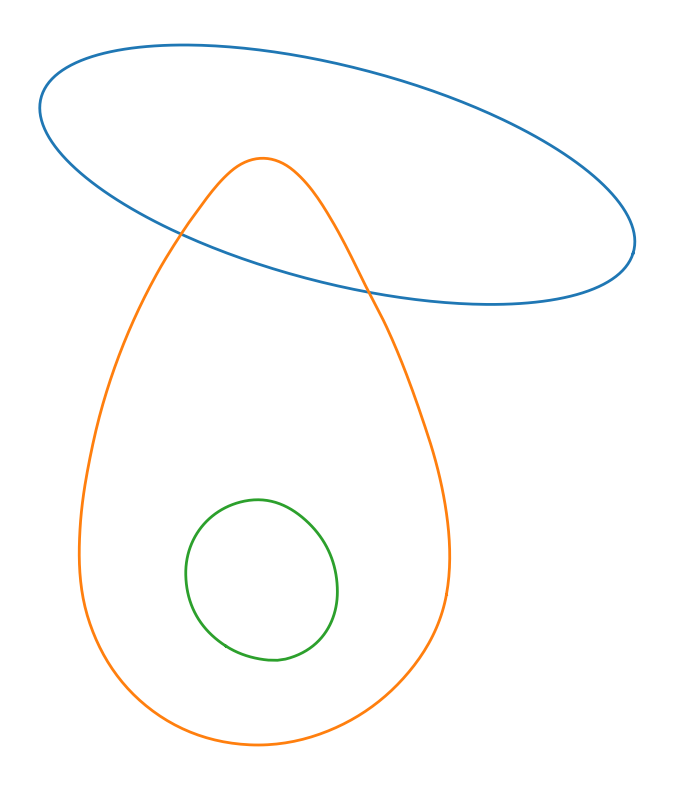

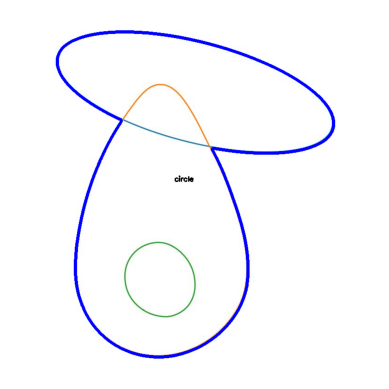

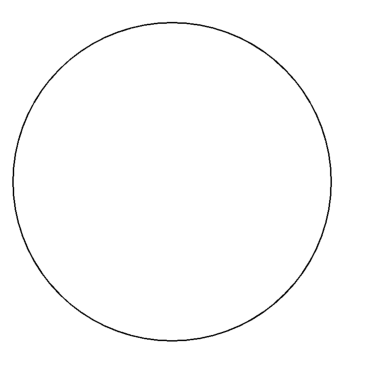

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def identify_shape(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) in [4, 5]:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the length of the Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    # Calculate curvature of the Bezier curve
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Adjust the first and last points for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    # Compute the Bezier curve from given points
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = './problems/occlusion1_sol.csv'
plot_polylines(read_csv(csv_path), './problems/occlusion1_sol_rec.png')
img = cv2.imread('./problems/occlusion1_sol_rec.png')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.ones_like(img) * 255

# Process each contour to identify and draw shapes
for contour in contours:
    # Approximate the contour to simplify it
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Identify the shape based on the approximation
    shape_name = identify_shape(approx)

    # Calculate the centroid of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Draw the contour and shape name on the original image
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Draw the shape on the separate image
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    else:
        draw_shape(shape_image, shape_name, approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


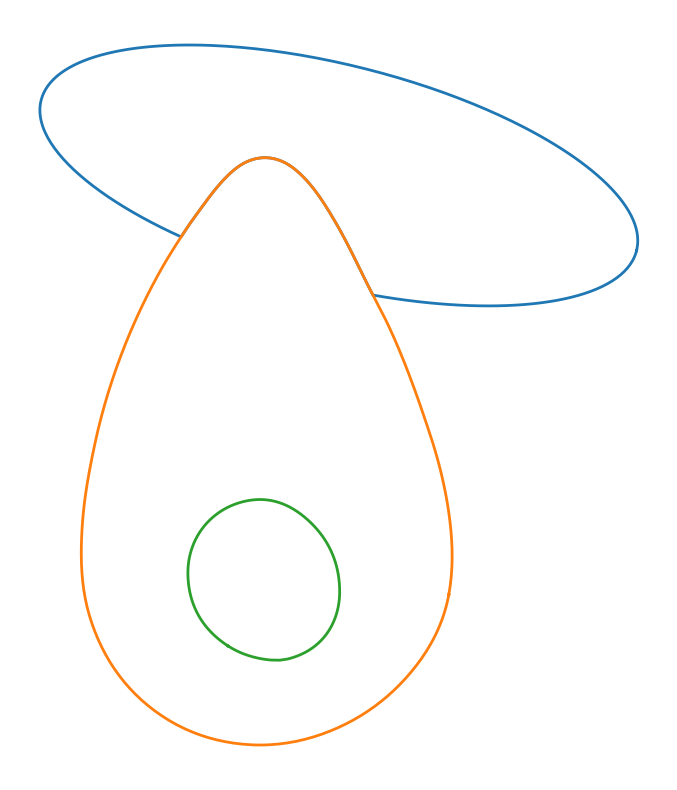

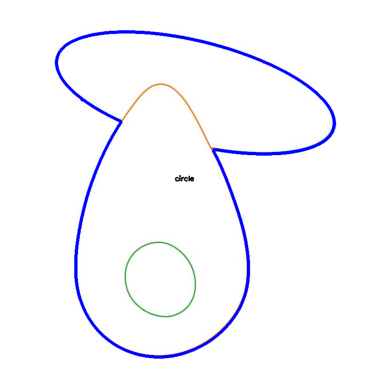

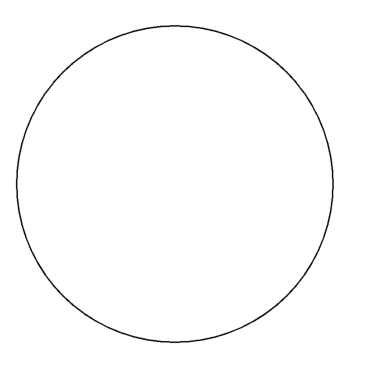

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def identify_shape(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) in [4, 5]:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the length of the Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    # Calculate curvature of the Bezier curve
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Adjust the first and last points for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    # Compute the Bezier curve from given points
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = './problems/occlusion1.csv'
plot_polylines(read_csv(csv_path), './problems/occlusion1_rec.png')
img = cv2.imread('./problems/occlusion1_rec.png')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.ones_like(img) * 255

# Process each contour to identify and draw shapes
for contour in contours:
    # Approximate the contour to simplify it
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Identify the shape based on the approximation
    shape_name = identify_shape(approx)

    # Calculate the centroid of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Draw the contour and shape name on the original image
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Draw the shape on the separate image
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    else:
        draw_shape(shape_image, shape_name, approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


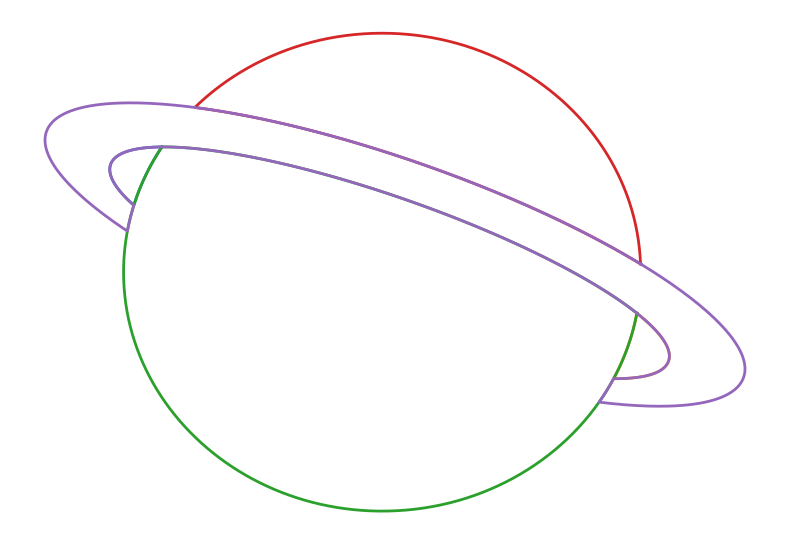

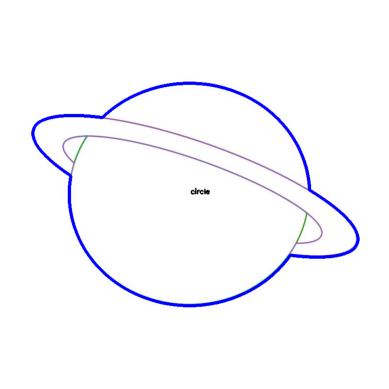

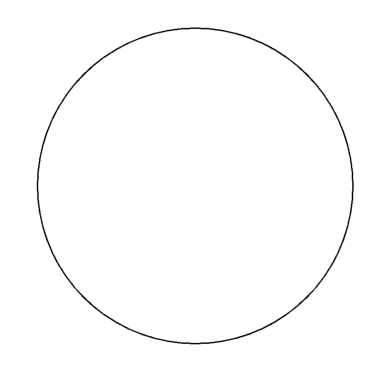

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def identify_shape(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) in [4, 5]:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the length of the Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    # Calculate curvature of the Bezier curve
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Adjust the first and last points for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    # Compute the Bezier curve from given points
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = './problems/occlusion2.csv'
plot_polylines(read_csv(csv_path), './problems/occlusion2_rec.png')
img = cv2.imread('./problems/occlusion2_rec.png')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.ones_like(img) * 255

# Process each contour to identify and draw shapes
for contour in contours:
    # Approximate the contour to simplify it
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Identify the shape based on the approximation
    shape_name = identify_shape(approx)

    # Calculate the centroid of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Draw the contour and shape name on the original image
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Draw the shape on the separate image
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    else:
        draw_shape(shape_image, shape_name, approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### For Occlusion2_sol.csv

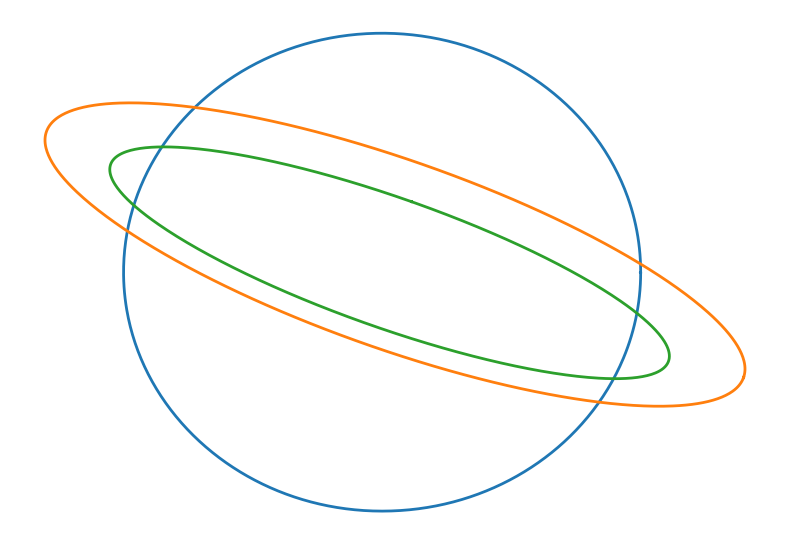

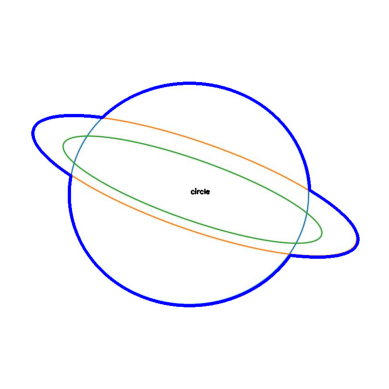

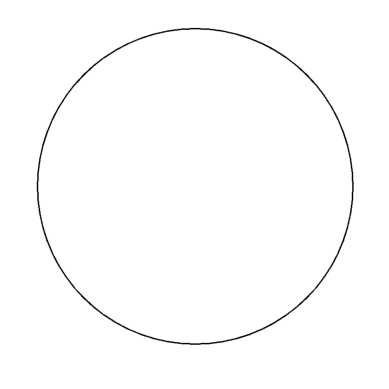

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

def read_csv(csv_path):
    # Read CSV data and parse it into a list of polylines
    data = np.genfromtxt(csv_path, delimiter=',')
    polylines = []
    for i in np.unique(data[:, 0]):
        poly_data = data[data[:, 0] == i][:, 1:]
        poly_lines = []
        for j in np.unique(poly_data[:, 0]):
            line_data = poly_data[poly_data[:, 0] == j][:, 1:]
            poly_lines.append(line_data)
        polylines.append(poly_lines)
    return polylines

def plot_polylines(paths, save_path=None):
    # Plot polylines and save the plot as an image
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, poly_lines in enumerate(paths):
        for line in poly_lines:
            ax.plot(line[:, 0], line[:, 1], linewidth=2, label=f'Polyline {i}')
    ax.set_aspect("equal")
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, format='jpg')
    plt.show()

def identify_shape(approx):
    # Identify the shape based on the number of vertices
    if len(approx) == 2:
        return "line"
    elif len(approx) == 3:
        return "triangle"
    elif len(approx) in [4, 5]:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "square"
        else:
            return "rectangle"
    elif len(approx) > 12:
        return "circle"
    else:
        return "polygon"

def fit_line(points):
    # Fit a line to the given points using linear regression
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def draw_shape(image, shape_type, points):
    # Draw the specified shape on the image
    if shape_type == "line":
        pt1 = tuple(points[0][0])
        pt2 = tuple(points[1][0])
        cv2.line(image, pt1, pt2, 0, 2)
    elif shape_type == "rectangle":
        x, y, w, h = cv2.boundingRect(points)
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        cv2.rectangle(image, top_left, bottom_right, 0, 2)
    elif shape_type == "circle":
        (x, y), radius = cv2.minEnclosingCircle(points)
        center = (int(x), int(y))
        radius = int(radius) - 30
        cv2.circle(image, center, radius, 0, 2)
    elif shape_type == "triangle":
        cv2.drawContours(image, [points], 0, 0, 2)
    elif shape_type == "ellipse":
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(image, ellipse, 0, 2)
    elif shape_type == "polygon":
        cv2.polylines(image, [points], isClosed=True, color=0, thickness=2)
    else:
        raise ValueError("Unsupported shape_type")

def draw_fitted_line(image, slope, intercept, color):
    # Draw a fitted line on the image
    height, width = image.shape[:2]
    x1, y1 = 0, int(intercept)
    x2, y2 = width, int(slope * width + intercept)
    cv2.line(image, (x1, y1), (x2, y2), color, 2)

def interpolate_points(points, num_points):
    # Interpolate points to a new number of points
    x = np.linspace(0, 1, len(points))
    interpolator = interp1d(x, points, kind='linear', axis=0, fill_value="extrapolate")
    new_x = np.linspace(0, 1, num_points)
    return interpolator(new_x)

def evaluate_accuracy(original, bezier):
    # Interpolate original points to match the length of the Bezier curve
    interpolated_original = interpolate_points(original, len(bezier))
    # Calculate Mean Squared Error between original and Bezier curve
    mse = np.mean((interpolated_original - bezier)**2)
    # Calculate Maximum Deviation between original and Bezier curve
    max_dev = np.max(np.abs(interpolated_original - bezier))
    return mse, max_dev

def compute_curvature(bezier):
    # Calculate curvature of the Bezier curve
    x, y = bezier[:, 0], bezier[:, 1]
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5
    return curvature

def adjust_ends(points):
    # Adjust the first and last points for smoothness
    if len(points) > 2:
        points[0] = 2 * points[1] - points[2]
        points[-1] = 2 * points[-2] - points[-3]
    return points

def compute_bezier_curve(points, smooth_factor=0.8):
    # Compute the Bezier curve from given points
    points = adjust_ends(points)
    tck, _ = splprep([points[:, 0], points[:, 1]], s=smooth_factor, k=3)
    u = np.linspace(0, 1.0, 2000)
    curve = splev(u, tck)
    return np.array(curve).T

# Example usage
csv_path = './problems/occlusion2_sol.csv'
plot_polylines(read_csv(csv_path), './problems/occlusion2_sol_rec.png')
img = cv2.imread('./problems/occlusion2_sol_rec.png')

# Convert the image to grayscale and detect edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((4, 4), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw fitted shapes and lines
shape_image = np.ones_like(img) * 255

# Process each contour to identify and draw shapes
for contour in contours:
    # Approximate the contour to simplify it
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Identify the shape based on the approximation
    shape_name = identify_shape(approx)

    # Calculate the centroid of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

    # Draw the contour and shape name on the original image
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 5)
    cv2.putText(img, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Draw the shape on the separate image
    if shape_name == 'line':
        points = np.vstack([point[0] for point in approx])
        slope, intercept = fit_line(points)
        draw_fitted_line(shape_image, slope, intercept, 255)
    else:
        draw_shape(shape_image, shape_name, approx)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(shape_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
